# Analysis - exp19 and 20

Repeats of stumbler (19) and stumbler-strategist (20) exps, with top 20 parameters.

In [ ]:
import os
import csv
import numpy as np
import torch as th

from glob import glob
from pprint import pprint

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from notebook_helpers import load_monitored
from notebook_helpers import join_monitored
from notebook_helpers import score_summary

# Find the files
## Exp 19

In [2]:
path = "/Users/type/Code/azad/data/wythoff/exp19/"
results_path = "/Users/type/Code/azad/data/wythoff/"

files = sorted(glob(os.path.join(path, "run_*_monitor.csv")))

exp_19 = []
for fi in files:
    mon = load_monitored(fi)
    exp_19.append(mon)

## Exp 20

In [3]:
path = "/Users/type/Code/azad/data/wythoff/exp20/"

exp_20 = []
runs = range(0, 20)
for r in runs:
    files = sorted(glob(os.path.join(path, 
        "run_{}_episode*_stumbler*".format(int(r)))))
    
    mon = join_monitored(files, sort_key='episode')
    exp_20.append(mon)

In [4]:
pprint(exp_19[0].keys())
pprint(exp_20[0].keys())

dict_keys(['file', 'episode', 'loss', 'score', 'total_reward'])
dict_keys(['file', 'episode', 'loss', 'score', 'total_reward'])


In [5]:
np.max(exp_20[0]['score'][-100:-1])

0.8361587591846802

In [6]:
print(np.max([np.max(mon['score'][-100:-1]) for mon in exp_19]))
print(np.max([np.max(mon['score'][-100:-1]) for mon in exp_20]))

0.8698498211904493
0.9096590320577658


# Plots

## Optimal play

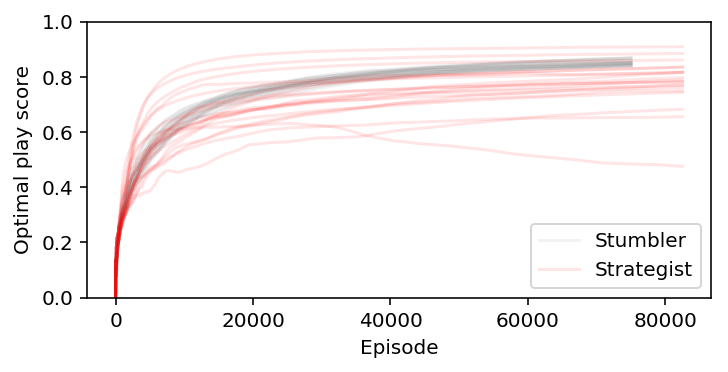

In [7]:
plt.figure(figsize=(5, 2.5))

for n, mon in enumerate(exp_19):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "Stumbler"
        
    # Plot
    _ = plt.plot(mon['episode'], mon['score'], 
                    color='grey', alpha=.1,  label=lab)

for n, mon in enumerate(exp_20):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "Strategist"
    
    # Plot
    _ = plt.plot(mon['episode'], mon['score'], 
                    color='red', alpha=.1, label=lab)

_ = plt.tight_layout()
_ = plt.legend()
_ = plt.ylim(0, 1)
_ = plt.xlabel("Episode")
_ = plt.ylabel("Optimal play score")

In [8]:
episode_1, exp_19_avg_score = score_summary(exp_19)
episode_2, exp_20_avg_score = score_summary(exp_20)

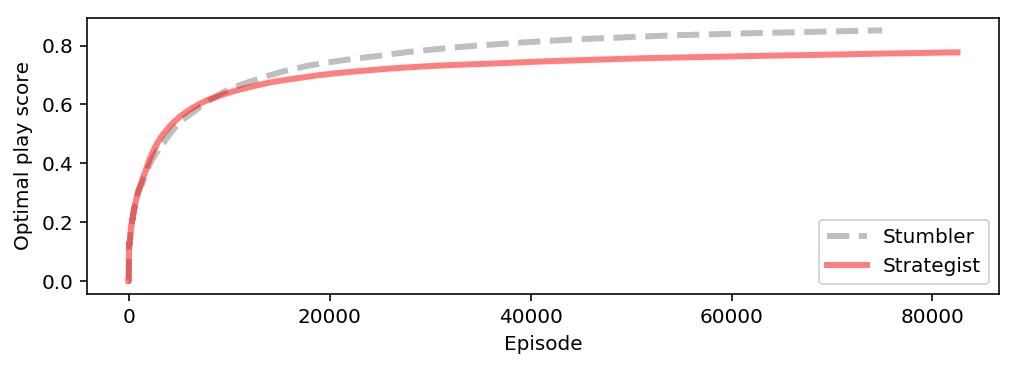

In [9]:
plt.figure(figsize=(7, 2.5))
_ = plt.plot(episode_1, exp_19_avg_score, linestyle="--", color='grey', alpha=.5, linewidth=3, label="Stumbler")
_ = plt.plot(episode_2, exp_20_avg_score, color='red', alpha=.5, linewidth=3, label="Strategist")
_ = plt.tight_layout()
_ = plt.legend()
_ = plt.xlabel("Episode")
_ = plt.ylabel("Optimal play score")

## Total reward

In [ ]:
plt.figure(figsize=(5, 2.5))

for n, mon in enumerate(exp_13):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "Stumbler"
        
    # Plot
    _ = plt.plot(
            mon['episode'], 
            np.asarray(mon['total_reward']),
            color='grey', alpha=1,  label=lab
    )

for n, mon in enumerate(exp_14):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "Strategist"
    
    # Plot
    _ = plt.plot(
            mon['episode'], 
            np.asarray(mon['total_reward']),
            color='red', alpha=1, label=lab
    )

_ = plt.tight_layout()
_ = plt.legend()
_ = plt.xlabel("Episode")
_ = plt.ylabel("Total reward")